In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as pyplot
import seaborn as sns

In [47]:
df = pd.read_csv(r"C:\Users\Aditya Koul\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()
print(df.columns)
print(f"The shape of the dataset : {df.shape} ")

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
The shape of the dataset : (1470, 35) 


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

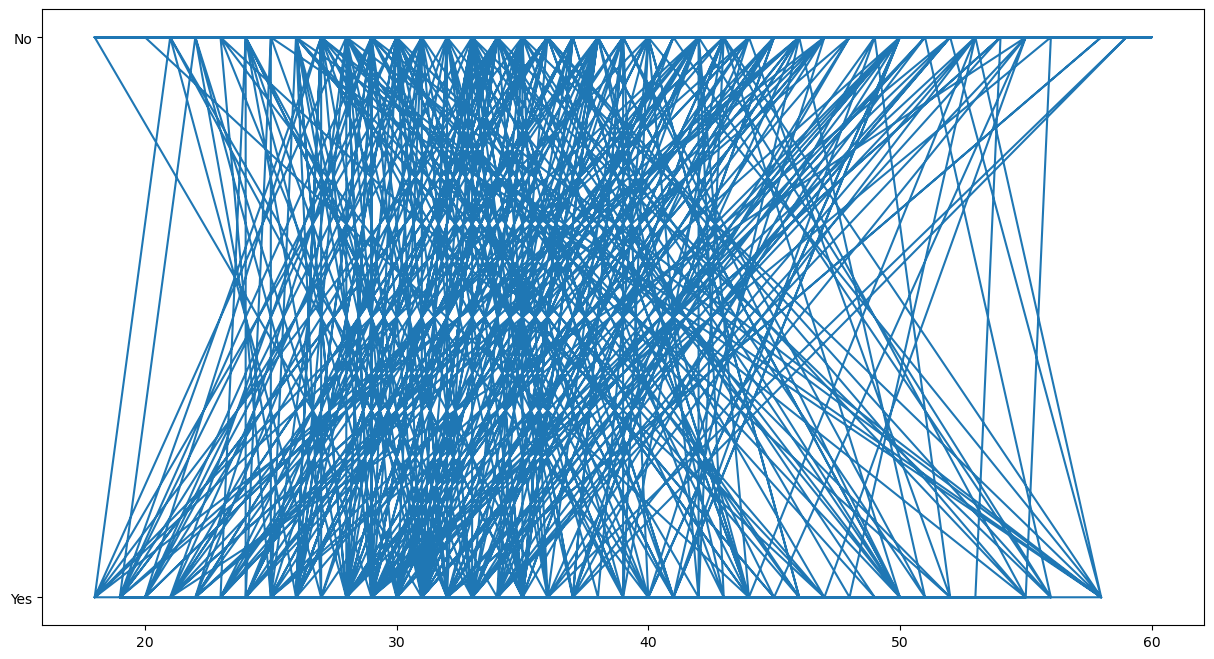

In [11]:
# Visualsiation
plt.figure(figsize=(15,8))
plt.plot(df.Age,df.Attrition)
plt.show()

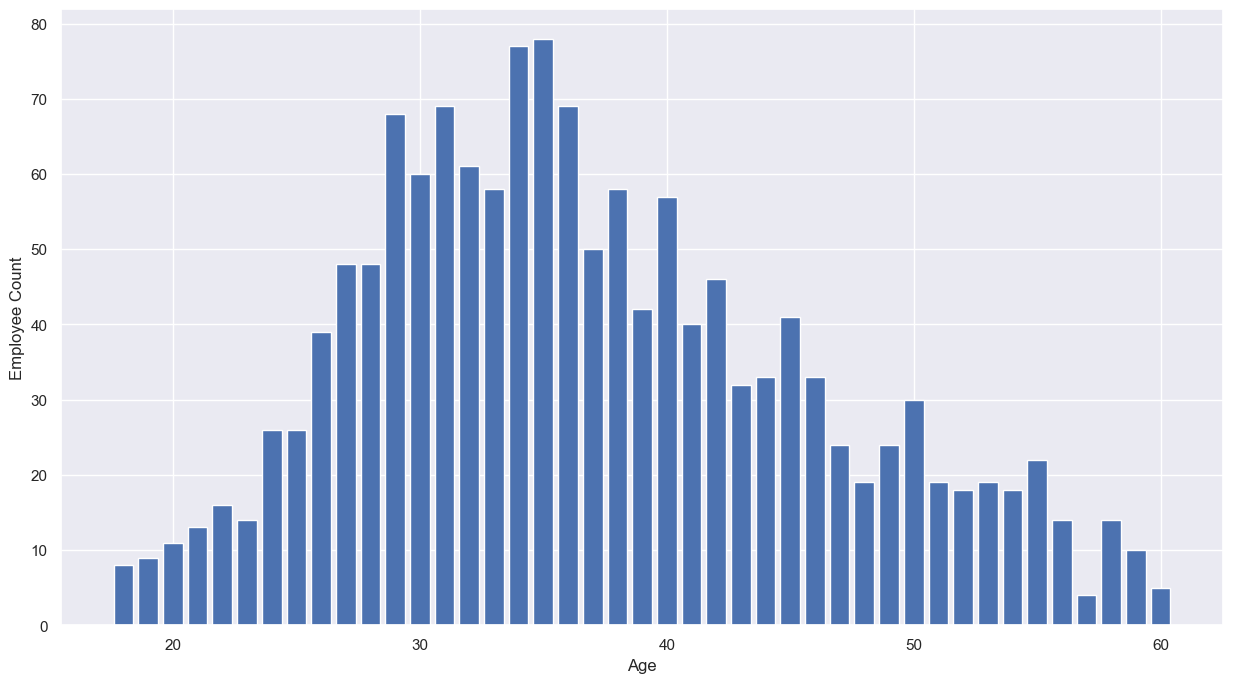

In [39]:
counts = df["Age"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Age")
plt.ylabel("Employee Count")
plt.show()

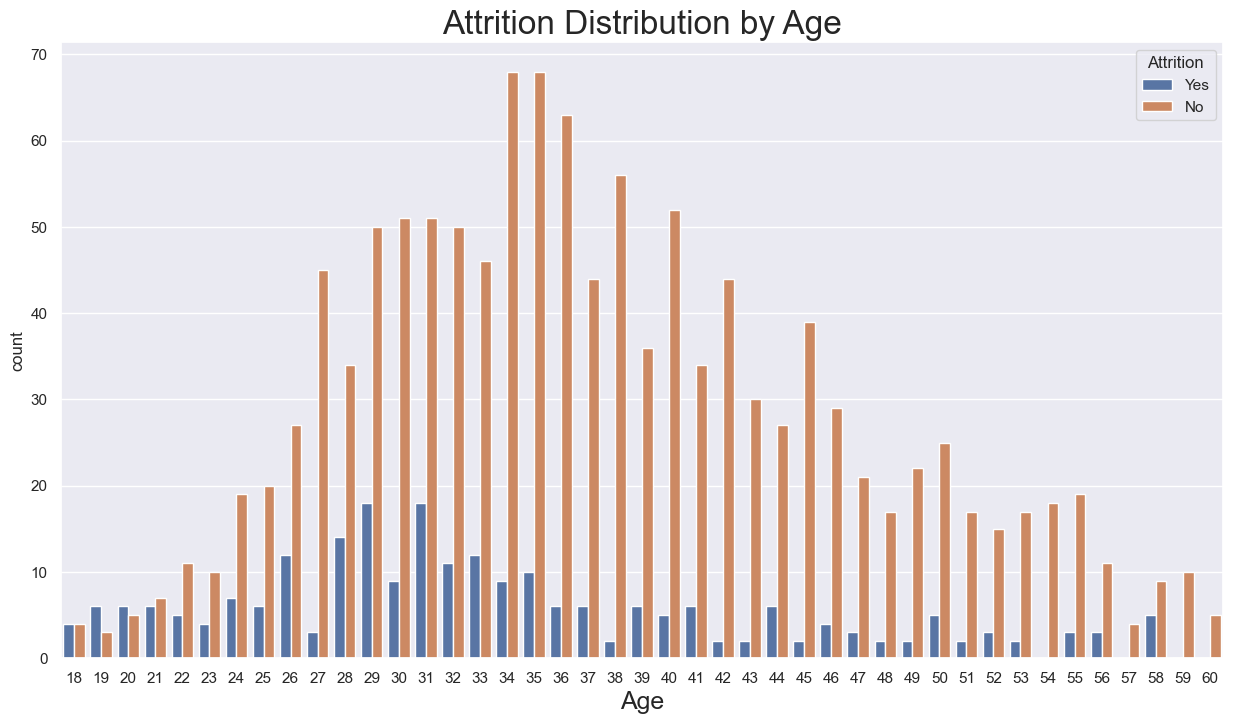

In [26]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Age', hue="Attrition", data=df)
plt.title('Attrition Distribution by Age', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.show()

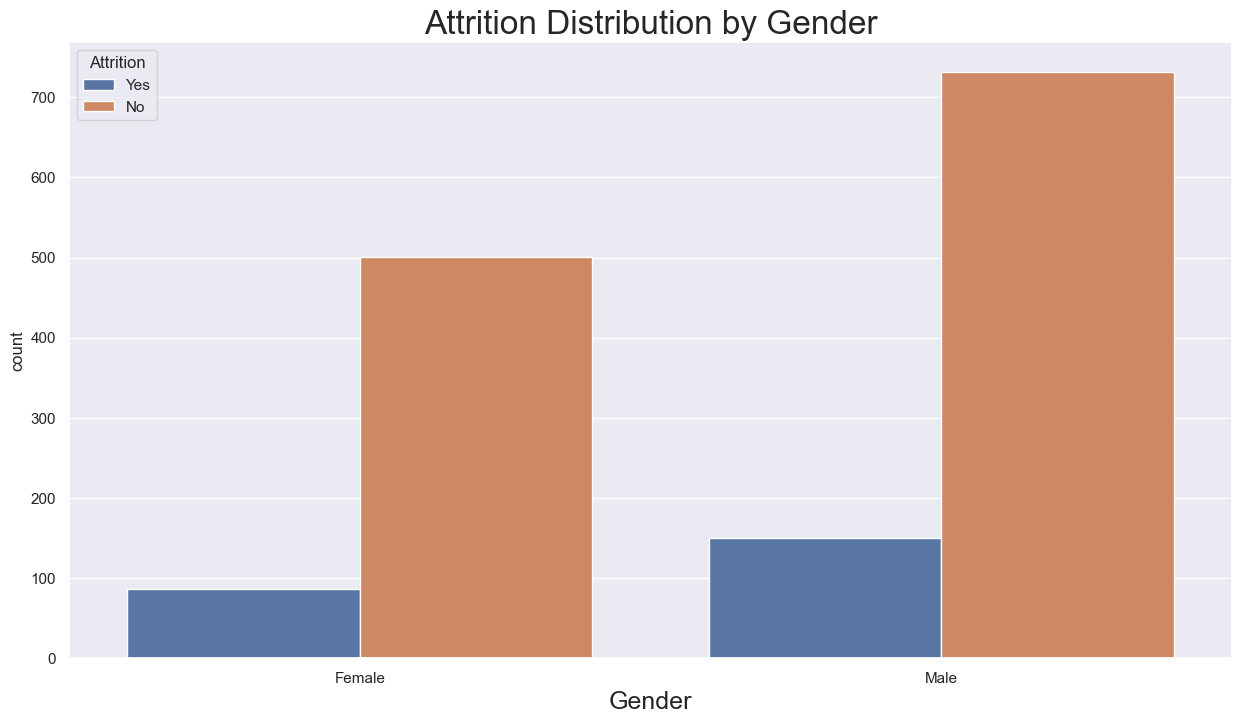

In [31]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Gender', hue="Attrition", data=df)
plt.title('Attrition Distribution by Gender', fontsize=24)
plt.xlabel('Gender', fontsize=18)
plt.show()

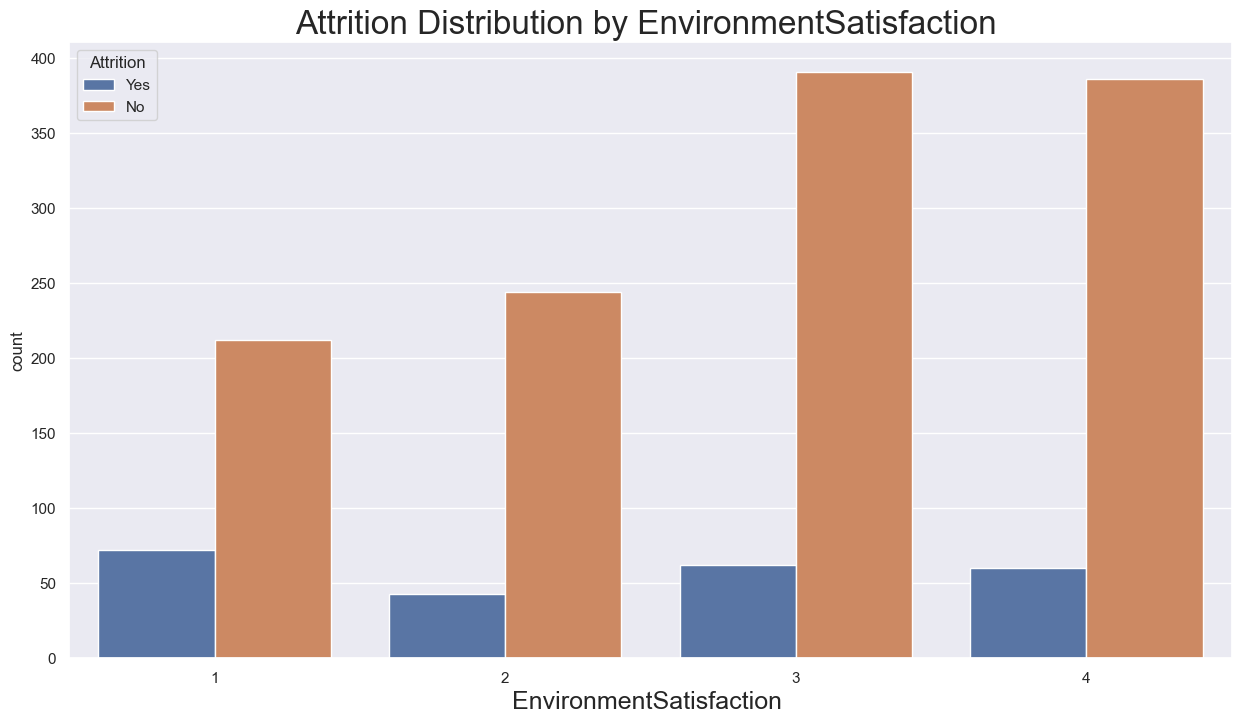

In [33]:
ax = sns.countplot(x='EnvironmentSatisfaction', hue="Attrition", data=df)
plt.title('Attrition Distribution by EnvironmentSatisfaction ', fontsize=24)
plt.xlabel('EnvironmentSatisfaction ', fontsize=18)
plt.show()

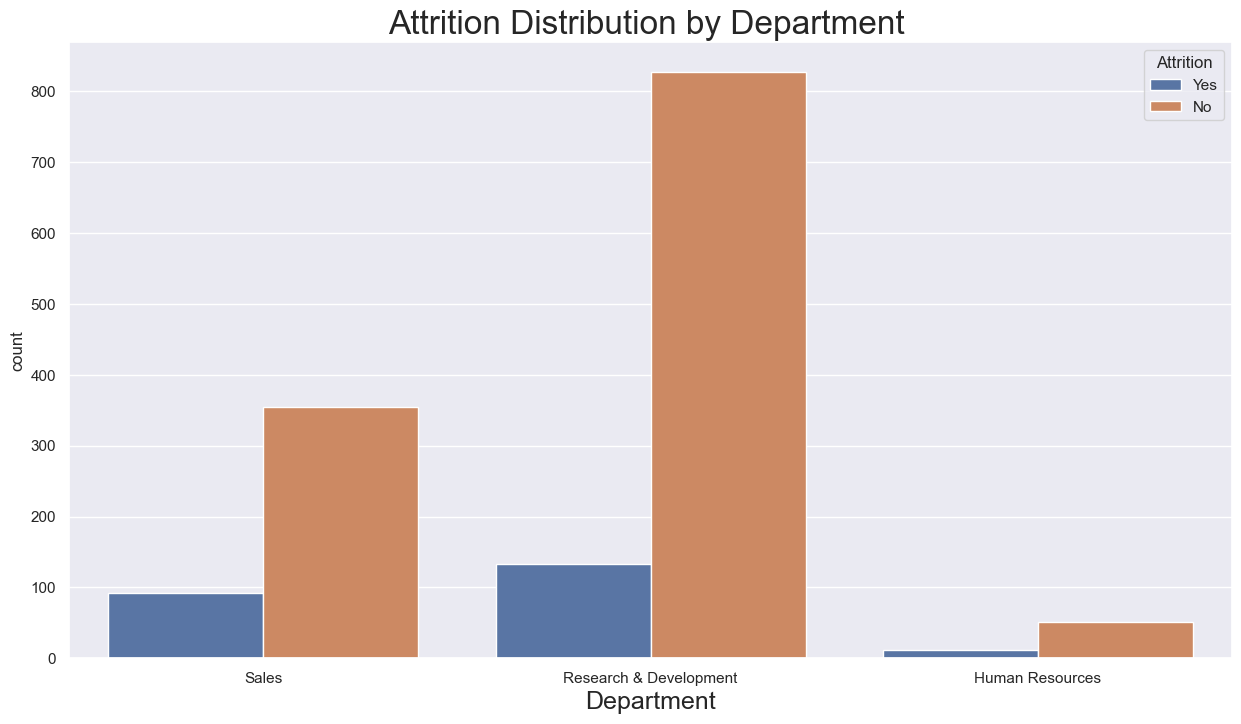

In [34]:
ax = sns.countplot(x='Department', hue="Attrition", data=df)
plt.title('Attrition Distribution by Department ', fontsize=24)
plt.xlabel('Department', fontsize=18)
plt.show()

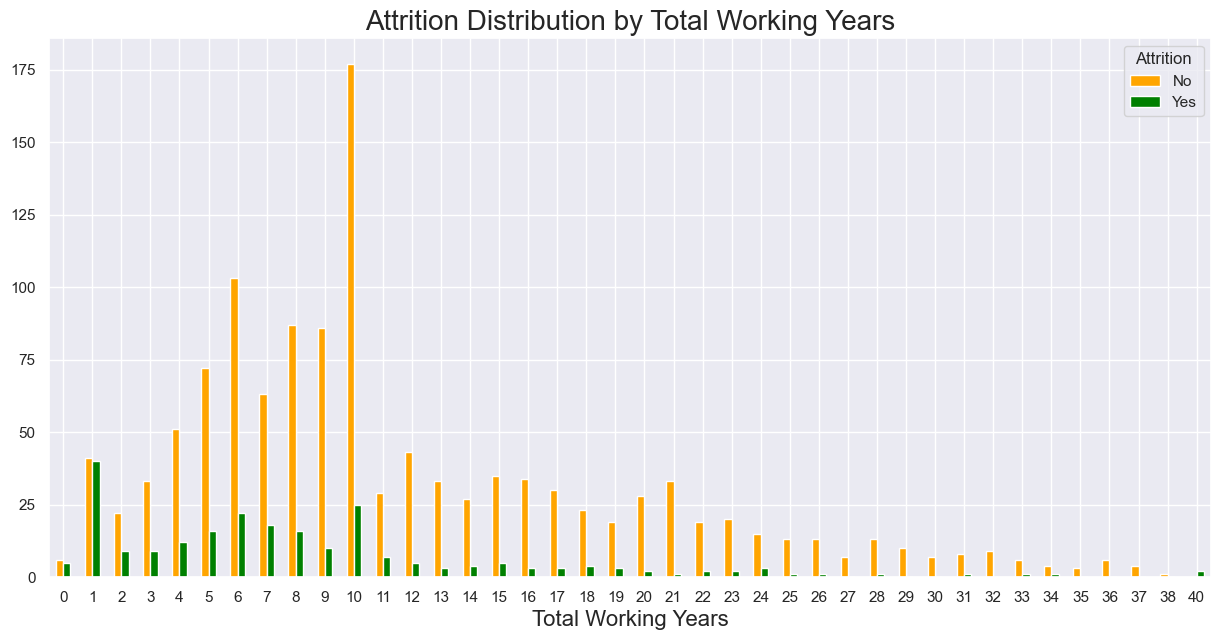

In [37]:
fig,ax = plt.subplots(figsize=(15,7))
working_years_group = df.groupby(['TotalWorkingYears','Attrition']).size().reset_index(name='number')
working_years_group = working_years_group.pivot(columns='Attrition', index='TotalWorkingYears', values = 'number')
working_years_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Attrition Distribution by Total Working Years', fontsize=20)
plt.xlabel('Total Working Years', fontsize=16)
plt.show() 

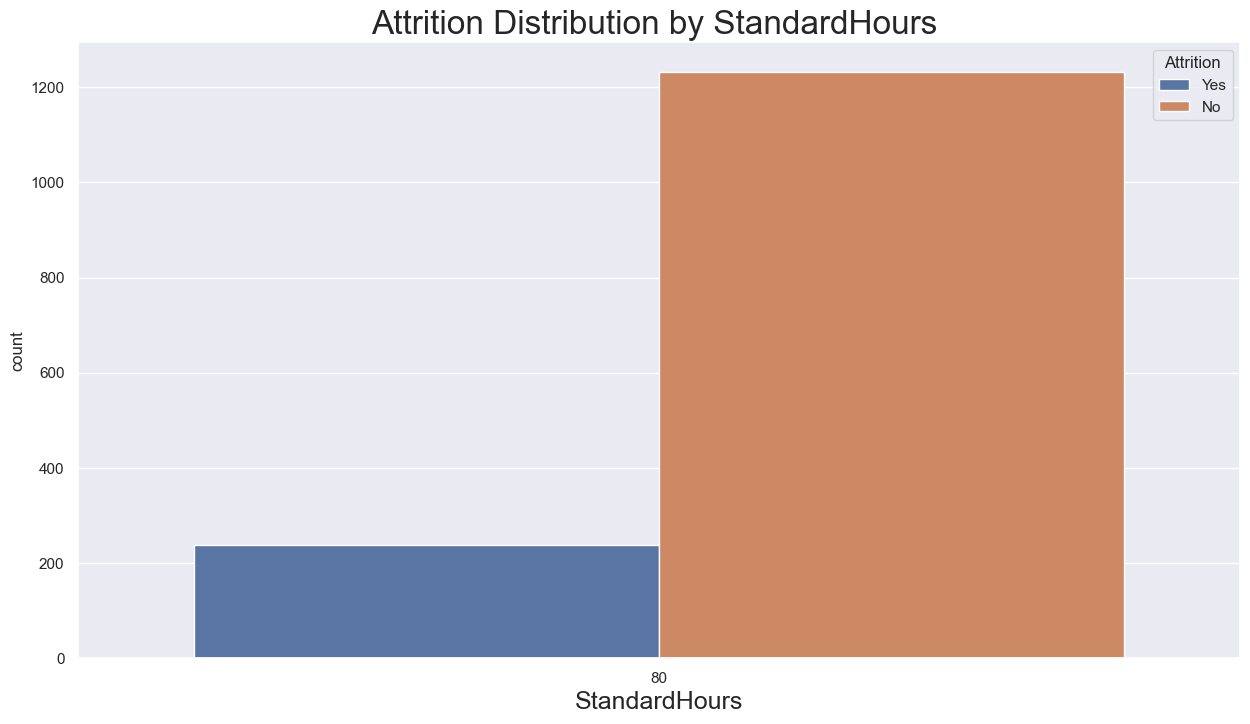

In [49]:
ax = sns.countplot(x='StandardHours', hue="Attrition", data=df)
plt.title('Attrition Distribution by StandardHours ', fontsize=24)
plt.xlabel('StandardHours', fontsize=18)
plt.show()

In [50]:
#preprocessing
df.drop(['EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [60]:
# categorical encoding
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column]=label_encoder.fit_transform(df[column])

In [61]:
#split features
X = df.drop('Attrition',axis=1)
Y = df['Attrition']

In [62]:
#train test split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=40,stratify=Y)

In [67]:
# train
model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
model.fit(Xtrain,Ytrain)

C:\Users\Aditya Koul\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [80]:
# give output for test set
y_pred = model.predict(Xtest)

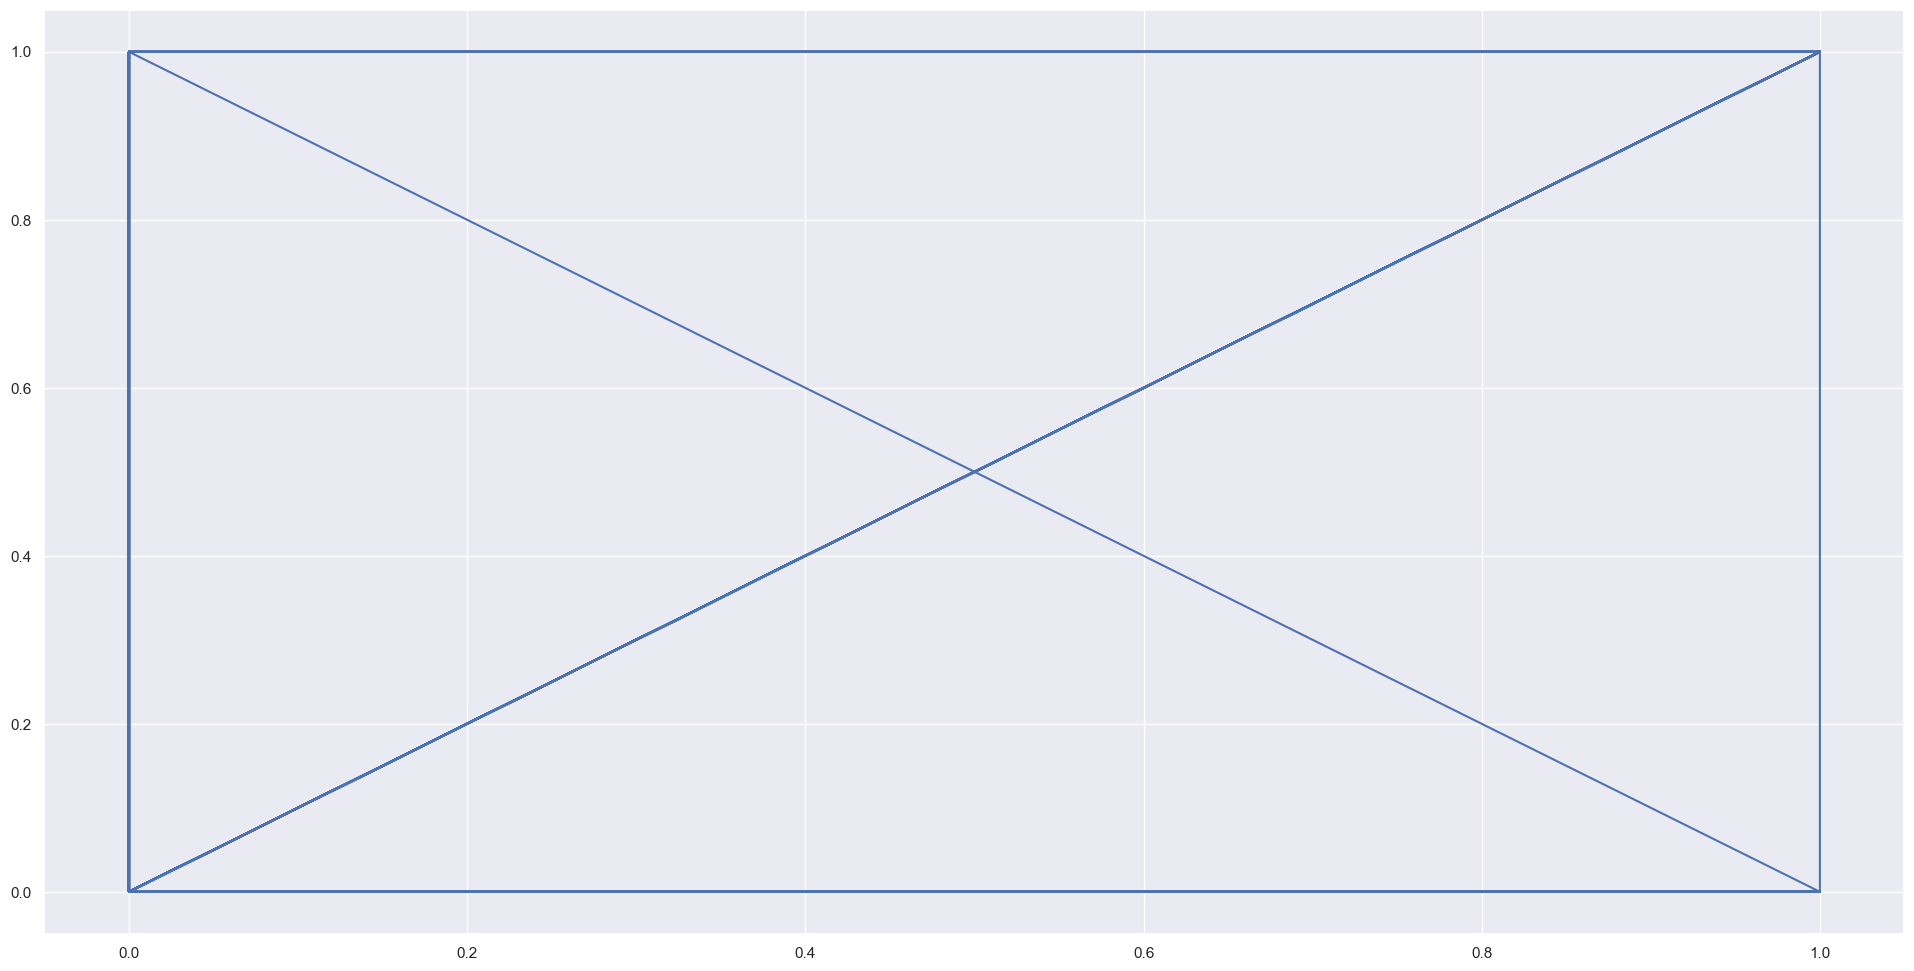

In [86]:
plt.figure(figsize=(24,12))
plt.plot(y_pred,Ytest)
plt.show()


In [91]:
#metrics
accuracy = accuracy_score(Ytest,y_pred)
conf_matrix = confusion_matrix(Ytest,y_pred)
class_report = classification_report(Ytest,y_pred)

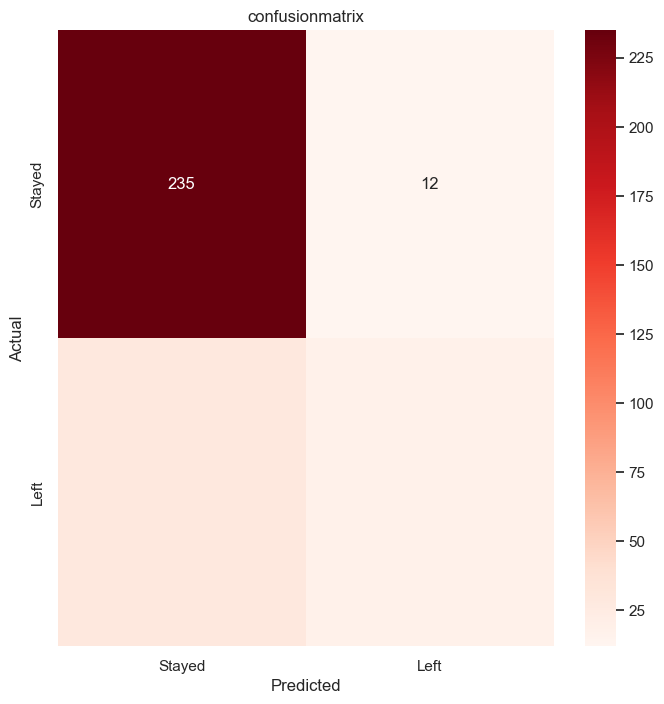

In [93]:
#visualise
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="Reds",xticklabels=['Stayed','Left'],yticklabels=['Stayed','Left'])
plt.title("confusionmatrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [94]:
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.60      0.38      0.47        47

    accuracy                           0.86       294
   macro avg       0.75      0.67      0.69       294
weighted avg       0.84      0.86      0.85       294



In [96]:
print(f"Accuracy score is {accuracy*100}%")

Accuracy score is 86.05442176870748%
